/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_Tran_32_4_CE_acc_16050-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_Tran_32_4_CE_acc_16060-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_32_4_CE_acc_16010-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_32_4_CE_acc_16020-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_Tran_32_4_CE_acc_16040-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_Tran_32_5_CE_acc_16030-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_Falcon_GPU_Full_CIFAR10_32_4_CE_acc_17000-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Mixed_CIFAR10_Tran_32_4_CE_acc_16055-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights tr

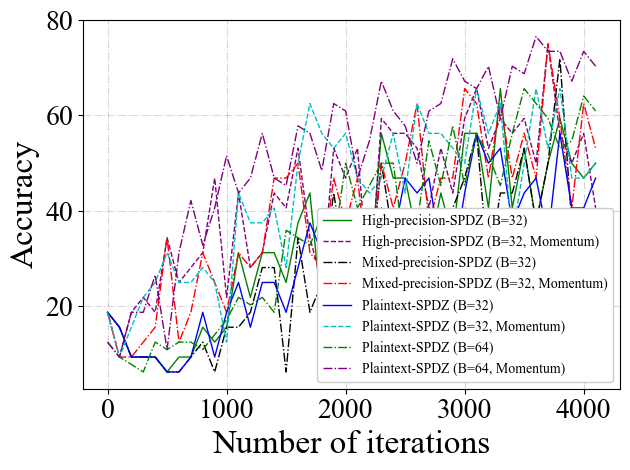

/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_Tran_32_4_CE_loss_16050-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_Tran_32_4_CE_loss_16060-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_32_4_CE_loss_16010-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_32_4_CE_loss_16020-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_Tran_32_4_CE_loss_16040-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Full_CIFAR10_Tran_32_5_CE_loss_16030-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_Falcon_GPU_Full_CIFAR10_32_4_CE_loss_17000-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init weights train_SPDZ_GPU_Mixed_CIFAR10_Tran_32_4_CE_loss_16055-epoch.txt
/home/haoqi.whq/DNN/output/AlexNet preloaded init we

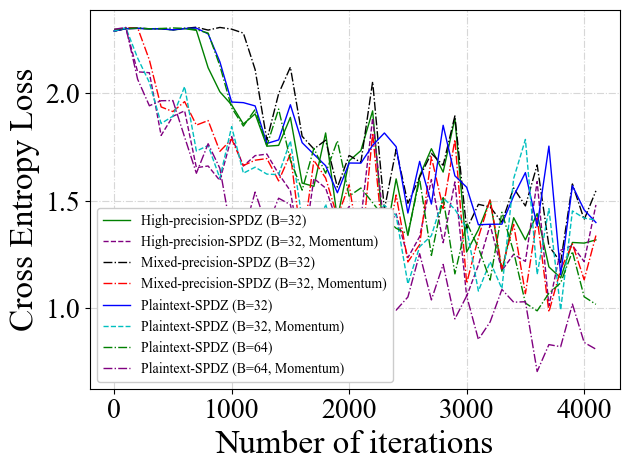

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os

# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['mathtext.fontset'] = 'stix'
# plt.rcParams['font.family'] = 'STIXGeneral'
# plt.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

models = ["SecureML", "MiniONN", "LeNet", "AlexNet", "VGG16"]
metrics = ["test_acc", "train_acc", "loss"]

font_family1 = {"family": "Times New Roman", "size": 24}
font_family2 = {"family": "Times New Roman", "size": 10}

interval = 100


def draw_acc_fig(
    data_list,
    name,
    base_path,
    model,
    dataset,
    legend,
):
    n_lines = len(data_list)
    print(len(data_list[0][0]), len(data_list[1][0]))
    length = min(len(data_list[0][0]), len(data_list[1][0]))
    print(length)
    # length = 5000

    print("drawing")
    plt.cla()
    # fig = plt.figure()
    ax = plt.subplot()

    colors = ['g', 'purple', 'black', 'r', 'b', 'c']
    linestyles = ['-', '--', '-.', '-.']

    for i, data in enumerate(data_list):
        x, y = data

        x = x[slice(0, length, interval)]
        y = y[slice(0, length, interval)]

        plt.plot(x, y, color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)], lw=1)
    # plt.plot(x_quant, y_quant, color="g", linestyle="-", lw=2)
    # # plt.plot(x_full_BN, y_full_BN, color='purple', linestyle='-.', lw=2)
    # plt.plot(x_full, y_full, color="purple", linestyle="--", lw=2)
    # # plt.plot(x_plaintext_BN, y_plaintext_BN, color='black', linestyle='-.', lw=2)
    # plt.plot(x_plaintext, y_plaintext, color="black", linestyle="-.", lw=2)
    plt.grid(True, alpha=0.5, linestyle="-.")
    # plt.yscale('log')
    plt.xlabel("Number of iterations", fontdict=font_family1)

    if name == "acc":
        ylabel = "Accuracy"
    elif name == "loss":
        ylabel = "Cross Entropy Loss"

    plt.ylabel(ylabel, fontdict=font_family1)
    plt.tick_params(labelsize=20)
    # plt.title(name, fontdict=font_family)
    # plt.xticks(x)
    plt.legend(
        legend,
        framealpha=1,
        prop=font_family2,
    )
    plt.tight_layout()
    plt.show()
    # print(base_path + model + "_" + dataset + "_" + name + ".pdf")
    # plt.savefig(base_path + model + '_' + dataset + '_' + name + '_15epoch.pdf')


def load_secret_data(
    is_mixed, model, use_SDPZ, dataset, suffix, num_iter, load_trained=False, use_BN=True, is_gpu=True
):
    x = []
    y = []
    file_path = (
        os.path.expanduser("~")
        + "/DNN/output/"
        + model
        + " preloaded"
        + (" trained weights" if load_trained else " init weights")
        + " train"
        + ("_SPDZ" if use_SDPZ else "_Falcon")
        + ("_GPU" if is_gpu else "_CPU")
        + "_"
        + ("Mixed" if is_mixed else "Full")
        + "_"
        + dataset
        + "_"
        + suffix
        + "_" + str(num_iter)
        + '-epoch'
        + ".txt"
    )
    # print(file_path)
    # file_path = base_path + metric + '.txt'
    if os.path.exists(file_path):
        file = open(file_path, "r")
        for line in file:
            x.append(int(line.split("\t")[0]))
            y.append(float(line.split("\t")[1]))
    # print(len(x))
    return x, y

def load_secret_data2(
    is_mixed, model, use_SDPZ, dataset, is_transform, is_shuffle, use_CE, suffix, batch_size, lr, num_iter, load_trained=False, use_BN=True, is_gpu=True
):
    x = []
    y = []
    file_path = (
        os.path.expanduser("~")
        + "/DNN/output/"
        + model
        + " preloaded"
        + (" trained weights" if load_trained else " init weights")
        + " train"
        + ("_SPDZ" if use_SDPZ else "_Falcon")
        + ("_GPU" if is_gpu else "_CPU")
        + "_"
        + ("Mixed" if is_mixed else "Full")
        + "_"
        + dataset
        + ("_Tran" if is_transform else "")
        + ("_Shuffle" if is_shuffle else "")
        + "_"
        + str(batch_size) + "_"
        + str(lr) + "_"
        + ("CE" if use_CE else "MSE") + "_"
        + suffix
        + "_" + str(num_iter)
        + '-epoch'
        + ".txt"
    )
    print(file_path)
    # file_path = base_path + metric + '.txt'
    if os.path.exists(file_path):
        file = open(file_path, "r")
        for line in file:
            x.append(int(line.split("\t")[0]))
            y.append(float(line.split("\t")[1]))
            if float(line.split("\t")[1]) < 0:
                print(line)
    # print(len(x))
    return x, y


def load_plaintext_data(model, use_SPDZ, dataset, suffix, num_iter, is_mixed=False, shuffle=False, use_BN=True, is_gpu=True):
    x = []
    y = []
    file_path = (
        os.path.expanduser("~")
        + "/DNN/output/"
        + model
        + "_"
        + ("SPDZ" if use_SPDZ else "Falcon")
        + ("_train_GPU" if True else "_train_CPU")
        + "_"
        + ("Mixed" if is_mixed else "Full")
        + "_"
        + dataset
        + "_"
        + suffix
        + "_" + str(num_iter)
        + '-epoch'
        + ("-shuffle" if shuffle else "")
        + ".txt"
    )
    # print(file_path)
    # file_path = base_path + metric + '.txt'
    if os.path.exists(file_path):
        file = open(file_path, "r")
        for line in file:
            x.append(int(line.split("\t")[0]))
            y.append(float(line.split("\t")[1]))
    return x, y


def load_plaintext_data2(model, use_SPDZ, dataset, is_transform, is_shuffle, batch_size, lr, use_MSE, suffix, num_iter, momentum=0, is_mixed=False, use_BN=True, is_gpu=True):
    x = []
    y = []
    file_path = (
    os.path.expanduser("~")
    + "/DNN/output/"
    + f"{model}_"
    + ("SPDZ" if use_SPDZ else "Falcon")
    + ("_train_GPU" if is_gpu else "_train_CPU")
    + "_"
    + f"{dataset}_"
    + ("Transform_" if is_transform else "")
    + ("Shuffle_" if is_shuffle else "")
    + str(batch_size) + "_"
    + str(lr) + "_"
    + str(momentum) + "_"
    + ("MSE_" if use_MSE else "CE_")
    + suffix
    + "_" + str(num_iter)
    + '-epoch'
    + ".txt"
)
    print(file_path)
    # file_path = base_path + metric + '.txt'
    if os.path.exists(file_path):
        file = open(file_path, "r")
        for line in file:
            x.append(int(line.split("\t")[0]))
            y.append(float(line.split("\t")[1]))
    return x, y

if __name__ == "__main__":
    model = "AlexNet"
    dataset = "CIFAR10"
    # suffix = 'acc'
    num_iter = 16000
    batch_size = 32
    log_lr = 4
    lr = 1. / (1 << log_lr)
    epoch = 10
    load_trained = False
    for suffix in ["acc", "loss"]:
        data_list = []

        # x_full, y_full = load_secret_data2(False, model, True, dataset, False, False, True, suffix, batch_size, log_lr, num_iter, load_trained=load_trained)
        x_full_32_t, y_full_32_t = load_secret_data2(False, model, True, dataset, True, False, True, suffix, batch_size, log_lr, 16050, load_trained=load_trained)
        x_full_32_t_momentum, y_full_32_t_momentum = load_secret_data2(False, model, True, dataset, True, False, True, suffix, batch_size, log_lr, 16060, load_trained=load_trained)
        x_full_32_plainall, y_full_32_plainall = load_secret_data2(False, model, True, dataset, False, False, True, suffix, 32, log_lr, 16010, load_trained=load_trained)
        x_full_32_plainall_t, y_full_32_plainall_t = load_secret_data2(False, model, True, dataset, False, False, True, suffix, 32, log_lr, 16020, load_trained=load_trained)
        x_full_32_plainall_t_fixbugs, y_full_32_plainall_t_fixbugs = load_secret_data2(False, model, True, dataset, True, False, True, suffix, 32, log_lr, 16040, load_trained=load_trained)
        x_full_32_plainall_t_momentum, y_full_32_plainall_t_momentum = load_secret_data2(False, model, True, dataset, True, False, True, suffix, 32, 5, 16030, load_trained=load_trained)
        x_full_falcon, y_full_falcon = load_secret_data2(False, model, False, dataset, False, False, True, suffix, batch_size, log_lr, 17000, load_trained=load_trained)
        # x_mixed_32, y_mixed_32 = load_secret_data2(True, model, True, dataset, False, False, True, suffix, batch_size, log_lr, num_iter, load_trained=load_trained)
        x_mixed_32_t, y_mixed_32_t = load_secret_data2(True, model, True, dataset, True, False, True, suffix, batch_size, log_lr, 16055, load_trained=load_trained)
        x_mixed_32_t_momentum, y_mixed_32_t_momentum = load_secret_data2(True, model, True, dataset, True, False, True, suffix, batch_size, log_lr, 16060, load_trained=load_trained)
        x_mixed_64_plain_rsqrt, y_mixed_64_plain_rsqrt = load_secret_data2(True, model, True, dataset, False, False, True, suffix, 64, log_lr, 7800, load_trained=load_trained)
        x_mixed_64_recy_9, y_mixed_64_recy_9 = load_secret_data2(True, model, True, dataset, False, False, True, suffix, 64, log_lr, 7810, load_trained=load_trained)
        x_mixed_64_momentum, y_mixed_64_momentum = load_secret_data2(True, model, True, dataset, False, False, True, suffix, 64, log_lr, 7820, load_trained=load_trained)
        
        # x_plaintext_BN_Falcon, y_plaintext_BN_Falcon = load_plaintext_data2(model, False, dataset, False, False, batch_size, lr, False, suffix, epoch, is_mixed=False)
        # x_plaintext_BN_Falcon_t, y_plaintext_BN_Falcon_t = load_plaintext_data2(model, False, dataset, True, False, batch_size, lr, False, suffix, epoch, is_mixed=False)
        # x_plaintext_BN_SPDZ, y_plaintext_BN_SPDZ = load_plaintext_data2(model, True, dataset, False, False, batch_size, lr, False, suffix, epoch, is_mixed=False)
        # x_plaintext_BN_SPDZ_trans, y_plaintext_BN_SPDZ_trans = load_plaintext_data2(model, True, dataset, True, False, batch_size, lr, False, suffix, epoch, is_mixed=False)
        # x_plaintext_BN_SPDZ_shuffle, y_plaintext_BN_SPDZ_shuffle = load_plaintext_data2(model, True, dataset, False, True, batch_size, lr, False, suffix, epoch, is_mixed=False)
        # x_plaintext_BN_SPDZ_shuffle_and_transform, y_plaintext_BN_SPDZ_shuffle_and_transform = load_plaintext_data2(model, True, dataset, True, True, batch_size, lr, False, suffix, epoch, is_mixed=False)
        # x_plaintext_BN_SPDZ_MSE, y_plaintext_BN_SPDZ_MSE = load_plaintext_data2(model, True, dataset, False, False, batch_size, lr, True, suffix, epoch, is_mixed=False)

        x_plaintext_BN_SPDZ_64B, y_plaintext_BN_SPDZ_64B = load_plaintext_data2(model, True, dataset, True, False, 64, lr, False, suffix, epoch, is_mixed=False)
        x_plaintext_BN_SPDZ_64B_momentum, y_plaintext_BN_SPDZ_64B_momentum = load_plaintext_data2(model, True, dataset, True, False, 64, lr, False, suffix, epoch, momentum=0.8, is_mixed=False)
        x_plaintext_BN_SPDZ_32B, y_plaintext_BN_SPDZ_32B = load_plaintext_data2(model, True, dataset, True, False, 32, lr, False, suffix, epoch, is_mixed=False, momentum=0)
        x_plaintext_BN_SPDZ_32B_momentum, y_plaintext_BN_SPDZ_32B_momentum = load_plaintext_data2(model, True, dataset, True, False, 32, lr, False, suffix, epoch, is_mixed=False, momentum=0.8)

        legend = []

        # data_list.append((x_full, y_full))
        # legend.append("High-precision-SPDZ (B=32)")

        data_list.append((x_full_32_t, y_full_32_t))
        legend.append("High-precision-SPDZ (B=32)")

        data_list.append((x_full_32_t_momentum, y_full_32_t_momentum))
        legend.append("High-precision-SPDZ (B=32, Momentum)")

        # data_list.append((x_full_falcon, y_full_falcon))
        # legend.append("High-precision-Falcon")

        # data_list.append((x_full_32_plainall, y_full_32_plainall))
        # legend.append("High-precision-SPDZ (B=32, P-all)")

        # data_list.append((x_full_32_plainall_t, y_full_32_plainall_t))
        # legend.append("High-precision-SPDZ (B=32, P-all, T)")

        # data_list.append((x_full_32_plainall_t_momentum, y_full_32_plainall_t_momentum))
        # legend.append("High-precision-SPDZ (B=32, P-all, T, Mom, 5lr)")

        # data_list.append((x_full_32_plainall_t_fixbugs, y_full_32_plainall_t_fixbugs))
        # legend.append("High-precision-SPDZ (B=32, P-all, T, fixbugs)")


        # data_list.append((x_mixed_32, y_mixed_32))
        # legend.append("Mixed-precision-SPDZ (B=32)")

        data_list.append((x_mixed_32_t, y_mixed_32_t))
        legend.append("Mixed-precision-SPDZ (B=32)")

        data_list.append((x_mixed_32_t_momentum, y_mixed_32_t_momentum))
        legend.append("Mixed-precision-SPDZ (B=32, Momentum)")

        # data_list.append((x_mixed_64_plain_rsqrt, y_mixed_64_plain_rsqrt))
        # legend.append("Mixed-precision-SPDZ (B=64, P-rsqrt)")

        # data_list.append((x_mixed_64_recy_9, y_mixed_64_recy_9))
        # legend.append("Mixed-precision-SPDZ (B=64)")

        # data_list.append((x_mixed_64_momentum, y_mixed_64_momentum))
        # legend.append("Mixed-precision-SPDZ (B=64, Momentum)")


        # data_list.append((x_plaintext_BN_Falcon, y_plaintext_BN_Falcon))
        # legend.append("Plaintext-Falcon")

        # data_list.append((x_plaintext_BN_Falcon_t, y_plaintext_BN_Falcon_t))
        # legend.append("Plaintext-Falcon-t")

        data_list.append((x_plaintext_BN_SPDZ_32B, y_plaintext_BN_SPDZ_32B))
        legend.append("Plaintext-SPDZ (B=32)")

        data_list.append((x_plaintext_BN_SPDZ_32B_momentum, y_plaintext_BN_SPDZ_32B_momentum))
        legend.append("Plaintext-SPDZ (B=32, Momentum)")
        
        data_list.append((x_plaintext_BN_SPDZ_64B, y_plaintext_BN_SPDZ_64B))
        legend.append("Plaintext-SPDZ (B=64)")
    
        data_list.append((x_plaintext_BN_SPDZ_64B_momentum, y_plaintext_BN_SPDZ_64B_momentum))
        legend.append("Plaintext-SPDZ (B=64, Momentum)")

        # data_list.append((x_plaintext_BN_SPDZ_trans, y_plaintext_BN_SPDZ_trans))
        # legend.append("Plaintext-SPDZ-t")

        # data_list.append((x_plaintext_BN_SPDZ_shuffle, y_plaintext_BN_SPDZ_shuffle))
        # legend.append("Plaintext-SPDZ-s")

        # data_list.append((x_plaintext_BN_SPDZ_shuffle_and_transform, y_plaintext_BN_SPDZ_shuffle_and_transform))
        # legend.append("Plaintext-SPDZ-s&t")

        # data_list.append((x_plaintext_BN_SPDZ_MSE, y_plaintext_BN_SPDZ_MSE))
        # legend.append("Plaintext-SPDZ-MSE")

        draw_acc_fig(
            data_list,
            suffix,
            f"{os.path.expanduser('~')}/DNN/output",
            model,
            dataset,
            legend,
        )
    # for model in models:
    #         for metric in metrics:
    #             x_quant, y_quant = load_data(True)
    #             x_full, y_full = load_data(False)
    #             draw_acc_fig(x_quant, y_quant, x_full, y_full, metric, 'log/' + model + '/', model)
    # draw_acc_fig(, metric, 'log/' + model + '/')
